# ARIMA Model

In [26]:
from utilities.std_imports import *
import datetime as dt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

### Data Loading

In [6]:
def parser(x):
    return dt.datetime.strptime('190'+x, '%Y-%m')

Month
1901-01-01    266.0
1901-02-01    145.9
1901-03-01    183.1
1901-04-01    119.3
1901-05-01    180.3
Name: Sales, dtype: float64


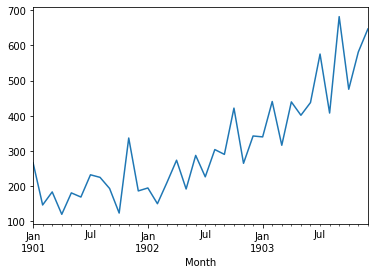

In [11]:
ts = pd.read_csv(ts_path + 'shampoo.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
print(ts.head())
ts.plot();

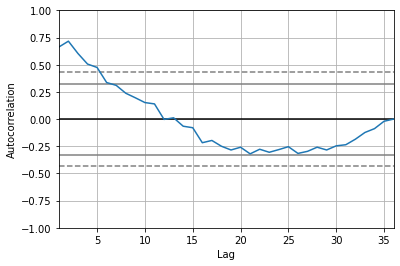

In [12]:
pd.plotting.autocorrelation_plot(ts);

### Fit Model

In [16]:
model = ARIMA(ts, order=(5,1,0))
model_fit = model.fit()
model_fit.summary()

c:\program files\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\program files\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\program files\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                   36
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -198.485
Date:                Mon, 30 Aug 2021   AIC                            408.969
Time:                        13:48:18   BIC                            418.301
Sample:                    01-01-1901   HQIC                           412.191
                         - 12-01-1903                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9014      0.247     -3.647      0.000      -1.386      -0.417
ar.L2         -0.2284      0.268     -0.851      0.395      -0.754       0.298
ar.L3          0.0747      0.291      0.256      0.798      -0.497       0.646
ar.L4          0.2519      0.340      0.742      0.458      -0.414       0.918
ar.L5          0.3344      0.210      1.593      0.111      -0.077       0.746
sigma2      4728.9608   1316.021      3.593      0.000    2149.607    7308.314
===================================================================================
Ljung-Box (L1) (Q):                   0.61   Jarque-Bera (JB):                 0.96
Prob(Q):                              0.44   Prob(JB):                         0.62
Heteroskedasticity (H):               1.07   Skew:                             0.28
Prob(H) (two-sided):                  0.90   Kurtosis:                         2.41
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

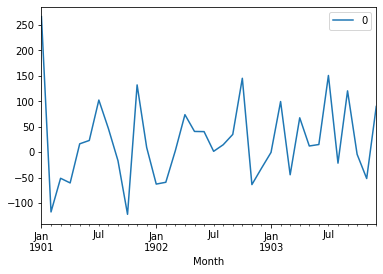

In [18]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot();

                0
count   36.000000
mean    21.936145
std     80.774430
min   -122.292030
25%    -35.040859
50%     13.147219
75%     68.848286
max    266.000000


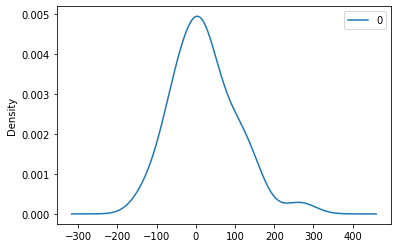

In [20]:
print(residuals.describe())
residuals.plot(kind='kde');

### Validation

predicted=343.272180, expected=342.300000
predicted=293.329674, expected=339.700000
predicted=368.668956, expected=440.400000
predicted=335.044741, expected=315.900000
predicted=363.220221, expected=439.300000
predicted=357.645323, expected=401.300000
predicted=443.047835, expected=437.400000
predicted=378.365674, expected=575.500000
predicted=459.415021, expected=407.600000
predicted=526.890876, expected=682.000000
predicted=457.231274, expected=475.300000
predicted=672.914943, expected=581.300000
predicted=531.541449, expected=646.900000
Test RMSE: 89.021


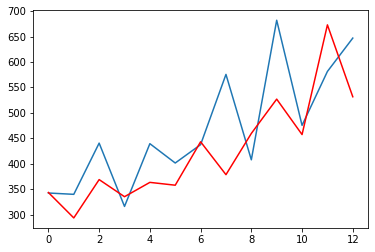

In [33]:
X = ts.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
hists = [x for x in train]
fcsts = list()

for t in range(len(test)):
    model = ARIMA(hists, order=(5,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    fcst = output[0]
    fcsts.append(fcst)
    hist = test[t]
    hists.append(hist)
    print('predicted=%f, expected=%f' % (fcst, hist))

rmse = sqrt(mean_squared_error(test, fcsts))
print('Test RMSE: %.3f' % rmse)

plt.plot(test)
plt.plot(fcsts, color='red');

In [31]:
fcsts

[343.2721804089405,
 343.2721804089405,
 343.2721804089405,
 343.2721804089405,
 343.2721804089405,
 343.2721804089405,
 343.2721804089405,
 343.2721804089405,
 343.2721804089405,
 343.2721804089405,
 343.2721804089405,
 343.2721804089405,
 343.2721804089405]

### Credits & Links

https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/